In [1]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

C:\Python\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
plt.style.use('ggplot')

In [3]:
# Extracting Data for plotting
data = pd.read_excel('data/input/sber/sber_2020-05-08-part.xlsx',
                     index_col=0,
                     names=['number', 'ticker', 'date', 'time', 'price', 'vol', 'sum'],
                     usecols='A:G',
                     parse_dates={'timestamp' : [2,3]})
print(data.dtypes)
data.head()

number      int64
ticker     object
price     float64
vol         int64
sum       float64
dtype: object


number ticker  price  vol     sum
timestamp                                             
2020-08-05 09:59:51       1   SBER  196.0    2  3920.0
2020-08-05 09:59:51       2   SBER  196.0    2  3920.0
2020-08-05 09:59:51       3   SBER  196.0    4  7840.0
2020-08-05 09:59:51       4   SBER  196.0    1  1960.0
2020-08-05 09:59:51       5   SBER  196.0    2  3920.0

In [4]:
data_price = data.loc[:, 'price'].resample('5T').ohlc()
data_price.tail()

open    high     low   close
timestamp                                          
2020-08-05 13:40:00  195.57  195.75  195.52  195.65
2020-08-05 13:45:00  195.66  195.73  195.56  195.61
2020-08-05 13:50:00  195.57  195.66  195.34  195.41
2020-08-05 13:55:00  195.41  195.47  195.26  195.27
2020-08-05 14:00:00  195.34  195.38  195.34  195.38

In [5]:
ohlc = data_price.loc[:, ['open', 'high', 'low', 'close']]
ohlc.insert(0, 'Date',  data_price.index.copy())
# ohlc['Date'] =  data_price.index.copy()
# ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
# ohlc = ohlc.reset_index(drop=True)
ohlc = ohlc.astype(float)
# ohlc = ohlc.head(10)
ohlc.head()

Date    open    high     low   close
timestamp                                                         
2020-08-05 09:55:00  737642.413194  196.00  196.00  196.00  196.00
2020-08-05 10:00:00  737642.416667  196.00  196.25  195.40  195.67
2020-08-05 10:05:00  737642.420139  195.72  195.98  195.01  195.19
2020-08-05 10:10:00  737642.423611  195.12  195.60  195.10  195.45
2020-08-05 10:15:00  737642.427083  195.50  195.58  195.33  195.47

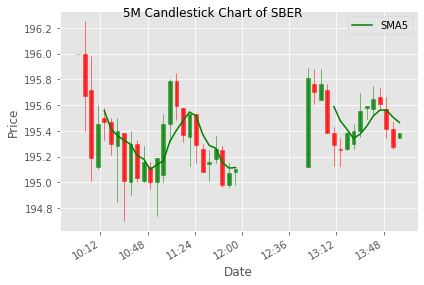

In [13]:
# Creating Subplots
fig, ax = plt.subplots()
# fraction of a day for the rectangle width
candlestick_ohlc(ax, ohlc.values, width=0.002, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('5M Candlestick Chart of SBER')

# Formatting Date
date_format = mpl_dates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

ohlc['SMA5'] = ohlc['close'].rolling(5).mean()
ax.plot(ohlc['Date'], ohlc['SMA5'], color='green', label='SMA5')
plt.legend(loc=0)
plt.show()